In [204]:
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

## Loading Dataset

This data is a collection of complaints about consumer financial products and services that we sent to companies for response. Complaints are published after the company responds, confirming a commercial relationship with the consumer, or after 15 days, whichever comes first
 
 
The dataset comprises of Consumer Complaints on Financial products (from dec-2011 to nov-2016) and we’ll see how to classify consumer complaints text into these categories: Debt collection, Consumer Loan, Mortgage, Credit card, Credit reporting, Student loan, Bank account or service, Payday loan, Money transfers, Other financial service, Prepaid card. Also we will try to identify the companies from the dataset

In [78]:
DATA = pd.read_csv('Consumer_Complaints.csv')
df = DATA.copy()
df.head()

/var/folders/9w/7mnbs3z90jvd7rw7s4ggz9xc0000gp/T/ipykernel_1171/103894161.py:1: DtypeWarning: Columns (5,11) have mixed types. Specify dtype option on import or set low_memory=False.
  DATA = pd.read_csv('Consumer_Complaints.csv')


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,07/29/2013,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,NaN,NaN,Wells Fargo & Company,VA,24540,NaN,NaN,Phone,07/30/2013,Closed with explanation,Yes,No,468882
1,07/29/2013,Bank account or service,Checking account,Using a debit or ATM card,NaN,NaN,NaN,Wells Fargo & Company,CA,95992,Older American,NaN,Web,07/31/2013,Closed with explanation,Yes,No,468889
2,07/29/2013,Bank account or service,Checking account,"Account opening, closing, or management",NaN,NaN,NaN,Santander Bank US,NY,10065,NaN,NaN,Fax,07/31/2013,Closed,Yes,No,468879
3,07/29/2013,Bank account or service,Checking account,Deposits and withdrawals,NaN,NaN,NaN,Wells Fargo & Company,GA,30084,NaN,NaN,Web,07/30/2013,Closed with explanation,Yes,No,468949
4,07/29/2013,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Franklin Credit Management,CT,06106,NaN,NaN,Web,07/30/2013,Closed with explanation,Yes,No,475823


In [79]:
df.shape

(670598, 18)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 670598 entries, 0 to 670597
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   Date received                 670598 non-null  object
 1   Product                       670598 non-null  object
 2   Sub-product                   472396 non-null  object
 3   Issue                         670598 non-null  object
 4   Sub-issue                     269868 non-null  object
 5   Consumer complaint narrative  114704 non-null  object
 6   Company public response       145197 non-null  object
 7   Company                       670598 non-null  object
 8   State                         665293 non-null  object
 9   ZIP code                      665274 non-null  object
 10  Tags                          94730 non-null   object
 11  Consumer consent provided?    208151 non-null  object
 12  Submitted via                 670598 non-null  object
 13 

In [95]:
df['Date received'] = pd.to_datetime(df['Date received'])
df['Date sent to company'] = pd.to_datetime(df['Date sent to company'])
df.sort_values('Date received', inplace=True)

In [96]:
df.nunique()

Date received                     1818
Product                             12
Sub-product                         47
Issue                               95
Sub-issue                           68
Consumer complaint narrative    112690
Company public response             10
Company                           3933
State                               62
ZIP code                         27889
Tags                                 3
Consumer consent provided?           4
Submitted via                        6
Date sent to company              1767
Company response to consumer         8
Timely response?                     2
Consumer disputed?                   2
Complaint ID                    670598
dtype: int64

In [348]:
nan_values_perc = df.isna().sum() / len(df) * 100
print(nan_values_perc)

Date received                    0.000000
Product                          0.000000
Sub-product                     29.556008
Issue                            0.000000
Sub-issue                       59.757112
Consumer complaint narrative    82.895267
Company public response         78.348131
Company                          0.000000
State                            0.791085
ZIP code                         0.793918
Tags                            85.873802
Consumer consent provided?      68.960391
Submitted via                    0.000000
Date sent to company             0.000000
Company response to consumer     0.000000
Timely response?                 0.000000
Consumer disputed?               6.176428
Complaint ID                     0.000000
dtype: float64


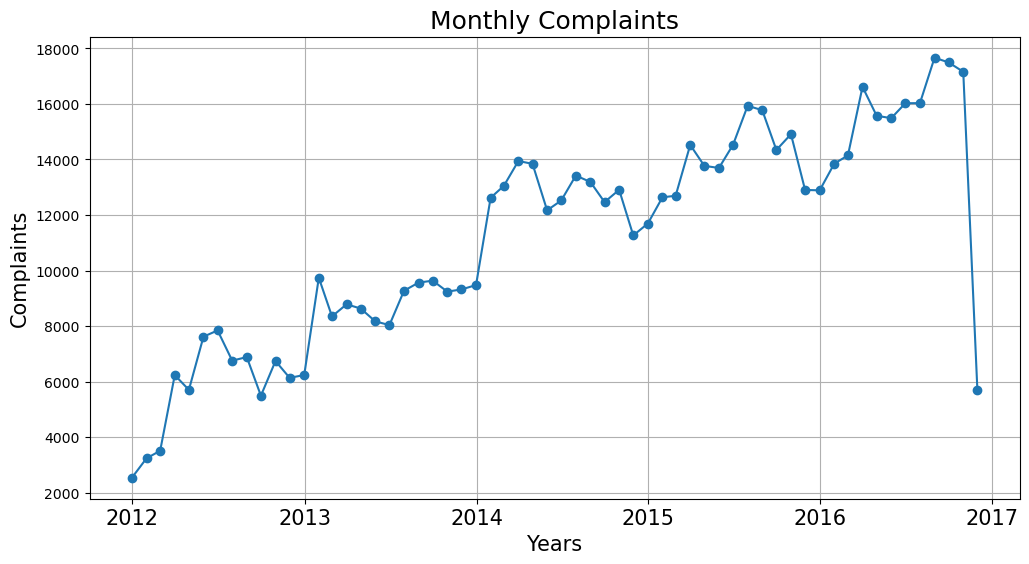

In [143]:
df_monthly = df.resample('M', on='Date received').count()


plt.figure(figsize=(12, 6))
plt.plot(df_monthly.index, df_monthly['Complaint ID'], marker='o')
plt.title('Monthly Complaints', fontsize=18)
plt.xlabel('Years', fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel('Complaints', fontsize=15)
plt.grid(True)
plt.show()

In [132]:
time_difference = (df['Date sent to company'] - df['Date received']).dt.total_seconds() / 86400
time_difference.sort_values(inplace=True)
time_difference.describe()

count    670598.000000
mean          4.395754
std          16.409079
min          -1.000000
25%           0.000000
50%           1.000000
75%           4.000000
max         993.000000
dtype: float64

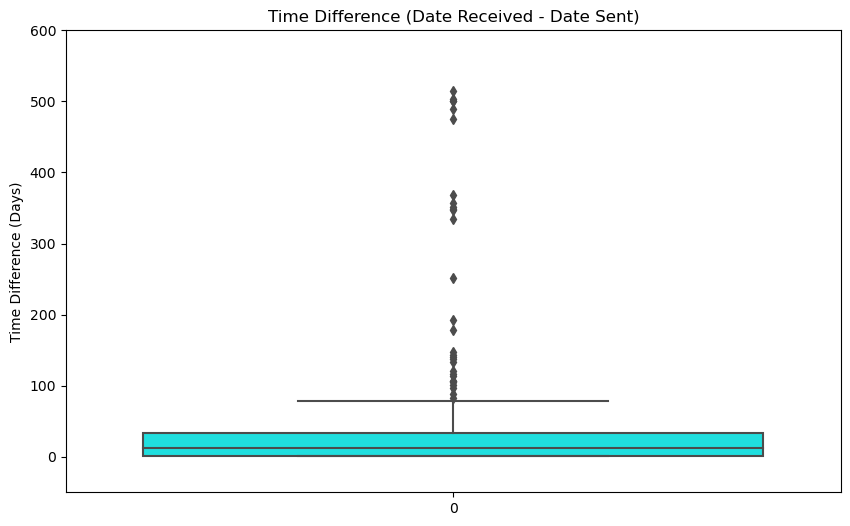

In [146]:
plt.figure(figsize=(10, 6))
sns.boxplot(time_difference.value_counts(), color='cyan')
plt.ylim(-50,600)
plt.title('Time Difference (Date Received - Date Sent)')
plt.ylabel('Time Difference (Days)')
plt.show()

In [216]:
last_date = df['Date received'].max()
last_year = last_date - timedelta(days=365)
last_year_records = df[df['Date received'] >= last_year]
last_year_records.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
367339,2015-11-22,Debt collection,"Other (i.e. phone, health club, etc.)",Disclosure verification of debt,Right to dispute notice not received,i did not receive a right to dispute letter fr...,Company believes it acted appropriately as aut...,"GLA Collection Company, Inc.",IN,479XX,NaN,Consent provided,Web,2015-11-22,Closed with explanation,Yes,No,1667202
506426,2015-11-22,Debt collection,Credit card,Improper contact or sharing of info,Talked to a third party about my debt,A company by the name of Midland Credit keeps ...,NaN,Encore Capital Group,TN,378XX,NaN,Consent provided,Web,2015-11-22,Closed with explanation,Yes,No,1667144
87956,2015-11-22,Bank account or service,Checking account,"Account opening, closing, or management",NaN,NaN,Company chooses not to provide a public response,Wells Fargo & Company,NV,89121,NaN,Consent not provided,Web,2015-11-22,Closed with non-monetary relief,Yes,No,1667300
506474,2015-11-22,Mortgage,Home equity loan or line of credit,Credit decision / Underwriting,NaN,NaN,Company chooses not to provide a public response,U.S. Bancorp,MN,55447,NaN,Consent not provided,Web,2015-11-23,Closed with explanation,Yes,Yes,1667203
87975,2015-11-22,Mortgage,VA mortgage,"Loan modification,collection,foreclosure",NaN,NaN,Company chooses not to provide a public response,Wells Fargo & Company,SC,29369,NaN,Consent not provided,Web,2015-11-22,Closed with explanation,Yes,No,1667163


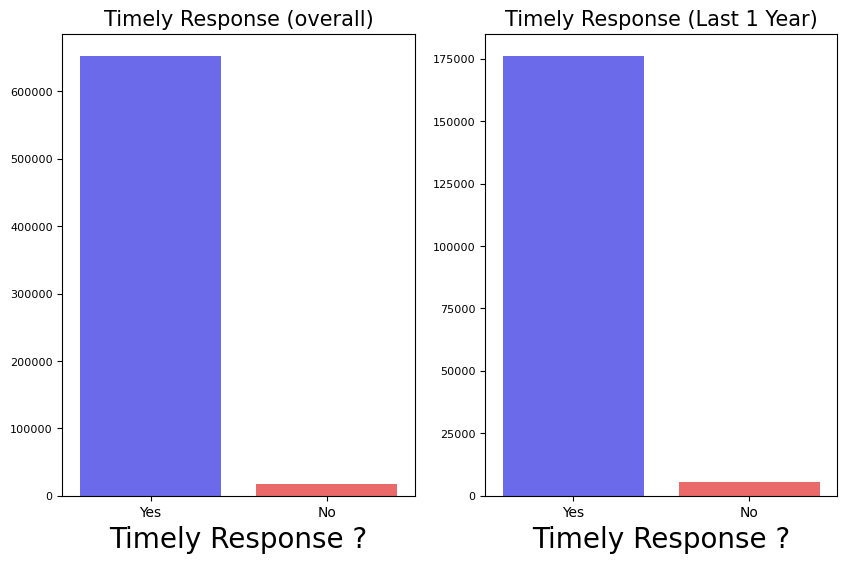

In [267]:
plt.figure(figsize = (10,6))

plt.subplot(1,2,1)
sns.countplot(x=df['Timely response?'], palette='seismic')
plt.title("Timely Response (overall)",fontsize=15)
plt.xticks(size = 10)
plt.yticks(size = 8)
plt.ylabel("")
plt.xlabel("Timely Response ?")

plt.subplot(1,2,2)
sns.countplot(x=last_year_records['Timely response?'], palette='seismic')
plt.title("Timely Response (Last 1 Year)",fontsize=15)
plt.xticks(size = 10)
plt.yticks(size = 8)
plt.ylabel("")
plt.xlabel("Timely Response ?")

plt.show()

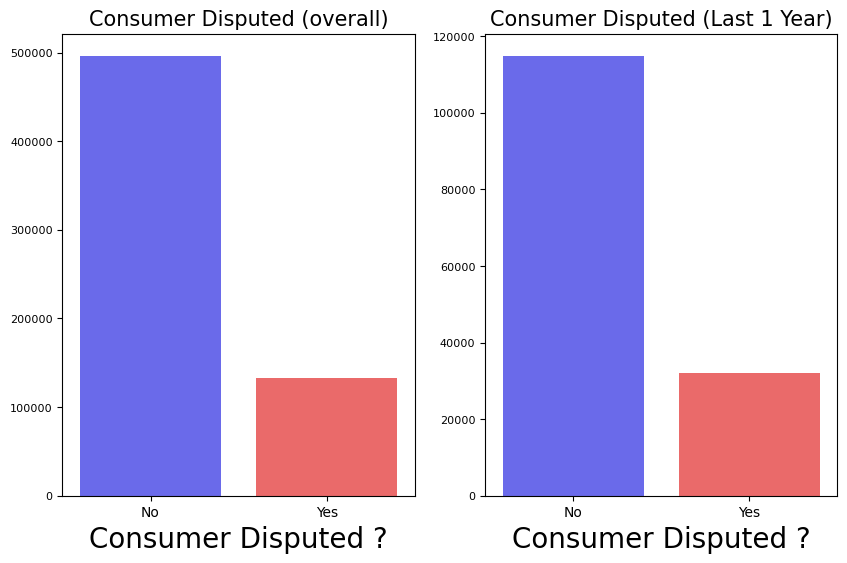

In [268]:
plt.figure(figsize = (10,6))


plt.subplot(1,2,1)
sns.countplot(x=df['Consumer disputed?'], palette='seismic')
plt.title("Consumer Disputed (overall)",fontsize=15)
plt.xticks(size = 10)
plt.yticks(size = 8)
plt.ylabel("")
plt.xlabel("Consumer Disputed ?")

plt.subplot(1,2,2)
sns.countplot(x=last_year_records['Consumer disputed?'], palette='seismic')
plt.title("Consumer Disputed (Last 1 Year)",fontsize=15)
plt.xticks(size = 10)
plt.yticks(size = 8)
plt.ylabel("")
plt.xlabel("Consumer Disputed ?")

plt.show()

## Products

In [104]:
complaint_by_product = df['Product']
complaint_by_product

391362                   Mortgage
530312                Credit card
530303                Credit card
257881                   Mortgage
530291                   Mortgage
                   ...           
668839            Debt collection
668902                   Mortgage
670002    Bank account or service
669362    Bank account or service
670173            Debt collection
Name: Product, Length: 670598, dtype: object

In [91]:
Rare_complaints = ['Consumer Loan', 'Student loan', 'Payday loan', 'Money transfers', 'Prepaid card', 'Other financial service', 'Virtual currency']
complaint_by_product = complaint_by_product.replace({itr: 'Others' for itr in Rare_complaints})

complaint_by_product.value_counts() / len(complaint_by_product)

Mortgage                   0.313636
Debt collection            0.185262
Credit reporting           0.177744
Credit card                0.117816
Bank account or service    0.113457
Others                     0.092085
Name: Product, dtype: float64

In [228]:
complaint_by_product_last_year = last_year_records['Product']

complaint_by_product_last_year = complaint_by_product_last_year.replace({itr: 'Others' for itr in Rare_complaints})

complaint_by_product_last_year.value_counts() / len(complaint_by_product_last_year)

Credit reporting           0.235795
Mortgage                   0.219980
Debt collection            0.207312
Others                     0.114759
Bank account or service    0.112900
Credit card                0.109253
Name: Product, dtype: float64

In [325]:
label_colors = {'Mortgage': 'skyblue', 
                'Credit reporting': 'orange', 
                'Debt collection': 'lightgreen', 
                'Others': 'pink', 
                'Bank account or service': 'gold', 
                'Credit card': 'cornflowerblue'}

colors1 = [label_colors[label] for label in complaints_prod.index]
colors2 = [label_colors[label] for label in complaints_prod_last_year.index]

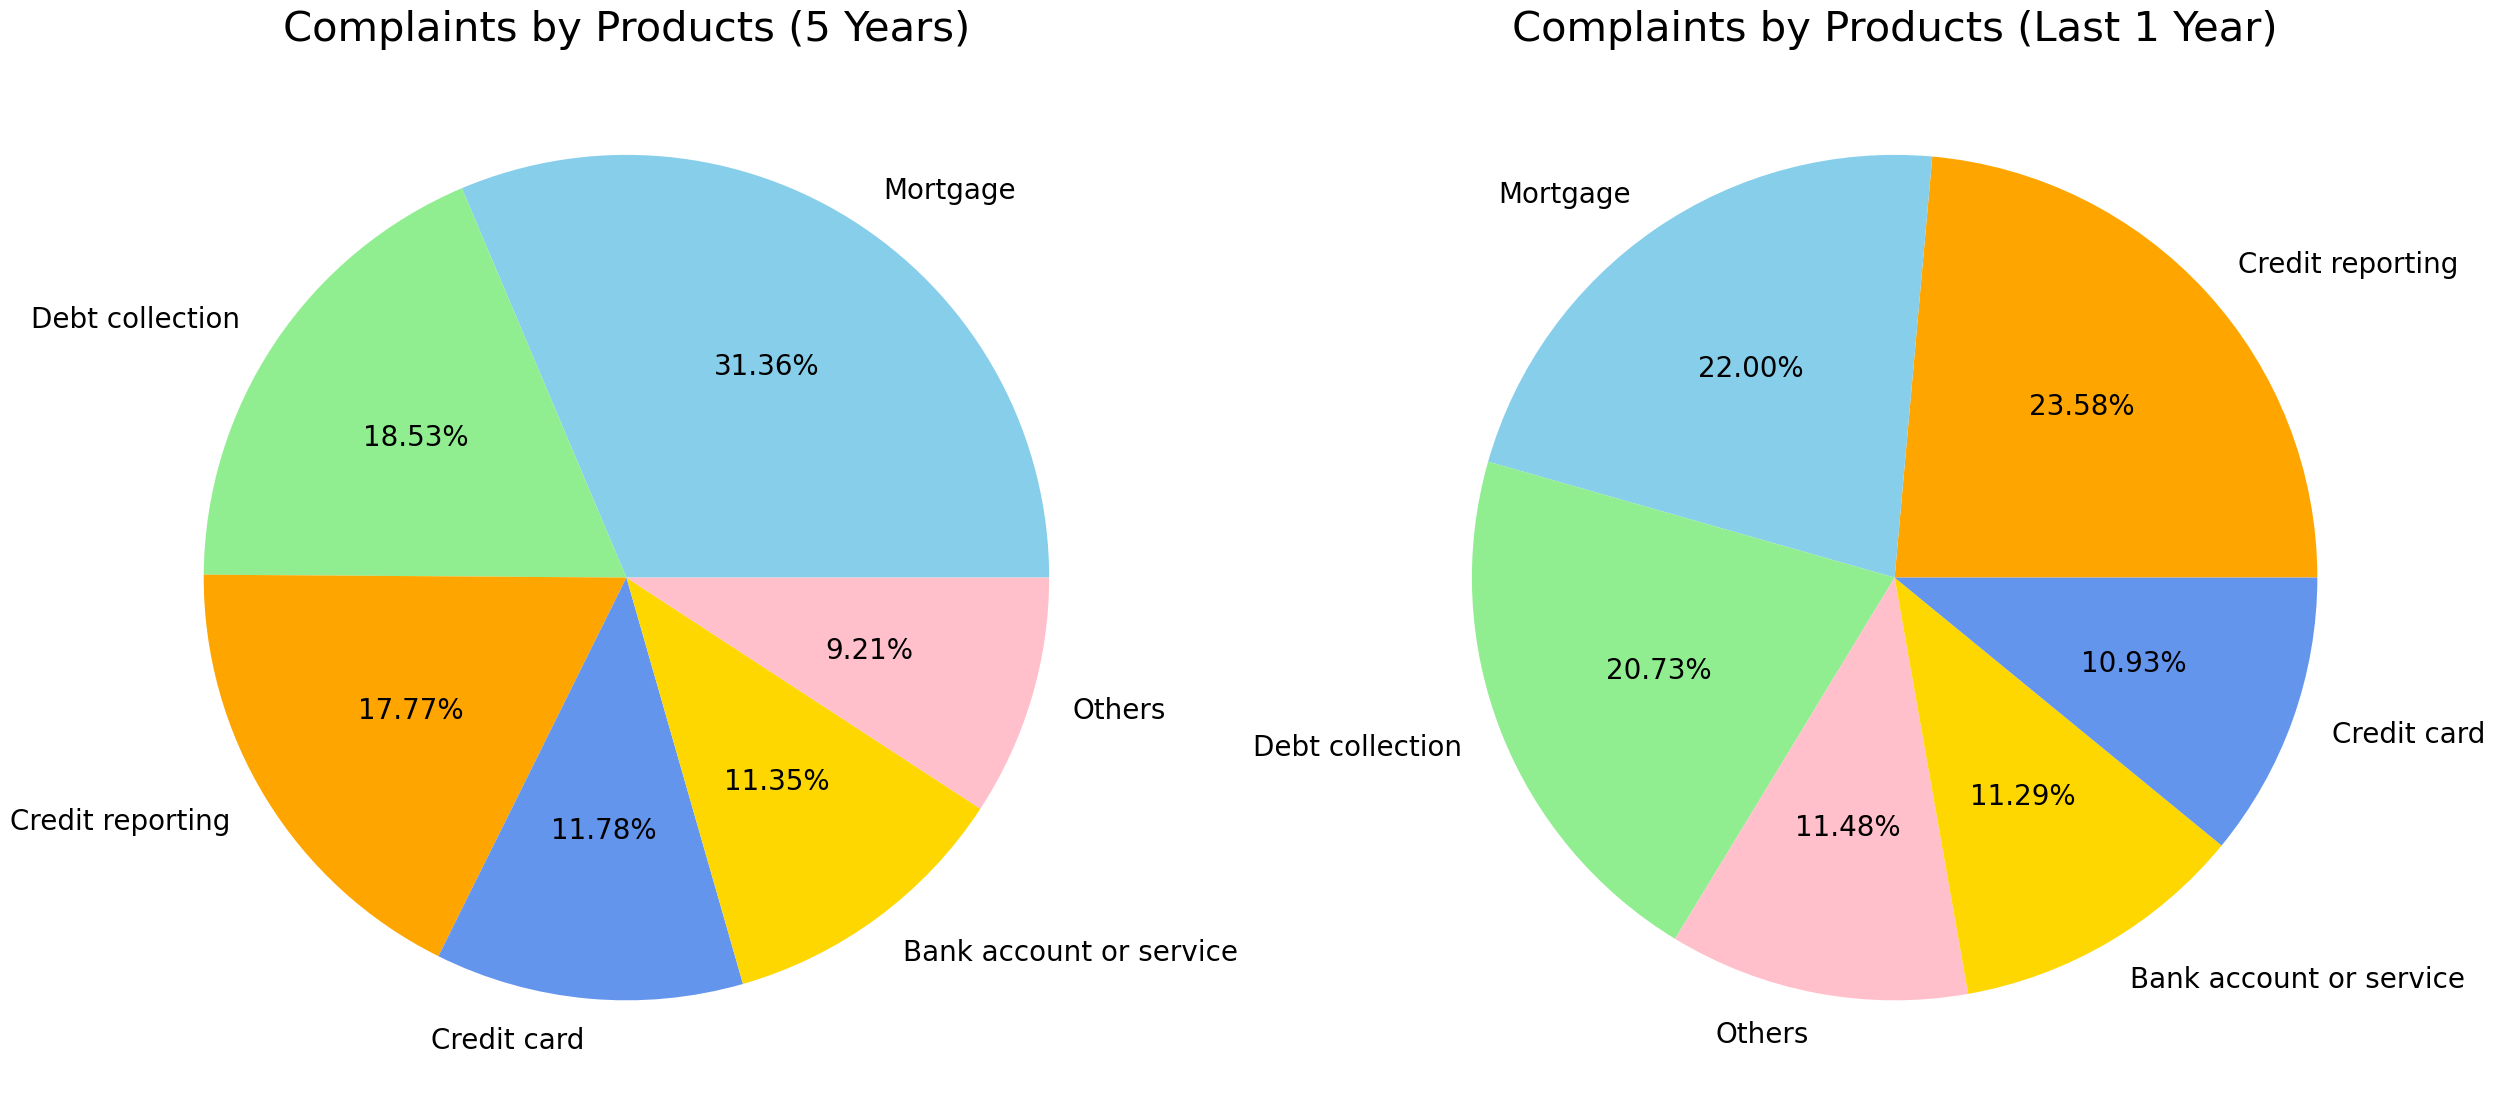

In [314]:
plt.figure(figsize=(30,20))

plt.subplot(1,2,1)
plt.pie(complaints_prod.values, labels=complaints_prod.index, autopct='%1.2f%%', colors=colors1)
plt.title('Complaints by Products (5 Years)',fontsize=30)
plt.rcParams['font.size'] = 20


plt.subplot(1,2,2)
plt.pie(complaints_prod_last_year.values, labels=complaints_prod_last_year.index, autopct='%1.2f%%', colors=colors2)
plt.title('Complaints by Products (Last 1 Year)',fontsize=30)
plt.rcParams['font.size'] = 20

plt.show()

## Issues

In [301]:
Issue = df['Issue'].value_counts()
Issue/len(df)

Loan modification,collection,foreclosure    0.158746
Incorrect information on credit report      0.129592
Loan servicing, payments, escrow account    0.104632
Cont'd attempts collect debt not owed       0.076931
Account opening, closing, or management     0.049727
                                              ...   
Lost or stolen money order                  0.000051
Incorrect exchange rate                     0.000031
Lender sold the property                    0.000010
Lender damaged or destroyed vehicle         0.000009
Lender damaged or destroyed property        0.000001
Name: Issue, Length: 95, dtype: float64

In [279]:
issues_last_year = last_year_records['Issue'].value_counts()
issues_last_year / len(complaint_by_product_last_year)

Incorrect information on credit report      0.173569
Loan servicing, payments, escrow account    0.089846
Loan modification,collection,foreclosure    0.087756
Cont'd attempts collect debt not owed       0.084945
Account opening, closing, or management     0.053507
                                              ...   
Disclosures                                 0.000072
Lost or stolen check                        0.000072
Incorrect exchange rate                     0.000055
Lender sold the property                    0.000011
Lender damaged or destroyed vehicle         0.000006
Name: Issue, Length: 90, dtype: float64

In [299]:
issue_label_colors = {'Loan modification,collection,foreclosure': 'skyblue', 
                      'Incorrect information on credit report': 'orange', 
                      'Loan servicing, payments, escrow account': 'lightgreen', 
                      "Cont'd attempts collect debt not owed": 'pink', 
                      'Account opening, closing, or management': 'cornflowerblue', 
                      'Disclosure verification of debt': 'gold', 
                      'Communication tactics': 'deepskyblue', 
                      'Deposits and withdrawals': 'khaki', 
                      "Credit reporting company's investigation": 'salmon',
                      "Dealing with my lender or servicer": 'mediumseagreen', 
                      'Application, originator, mortgage broker': 'tomato'}


issue_colors1 = [issue_label_colors[label] for label in Issue.index[:10]]
issue_colors2 = [issue_label_colors[label] for label in issues_last_year.index[:10]]

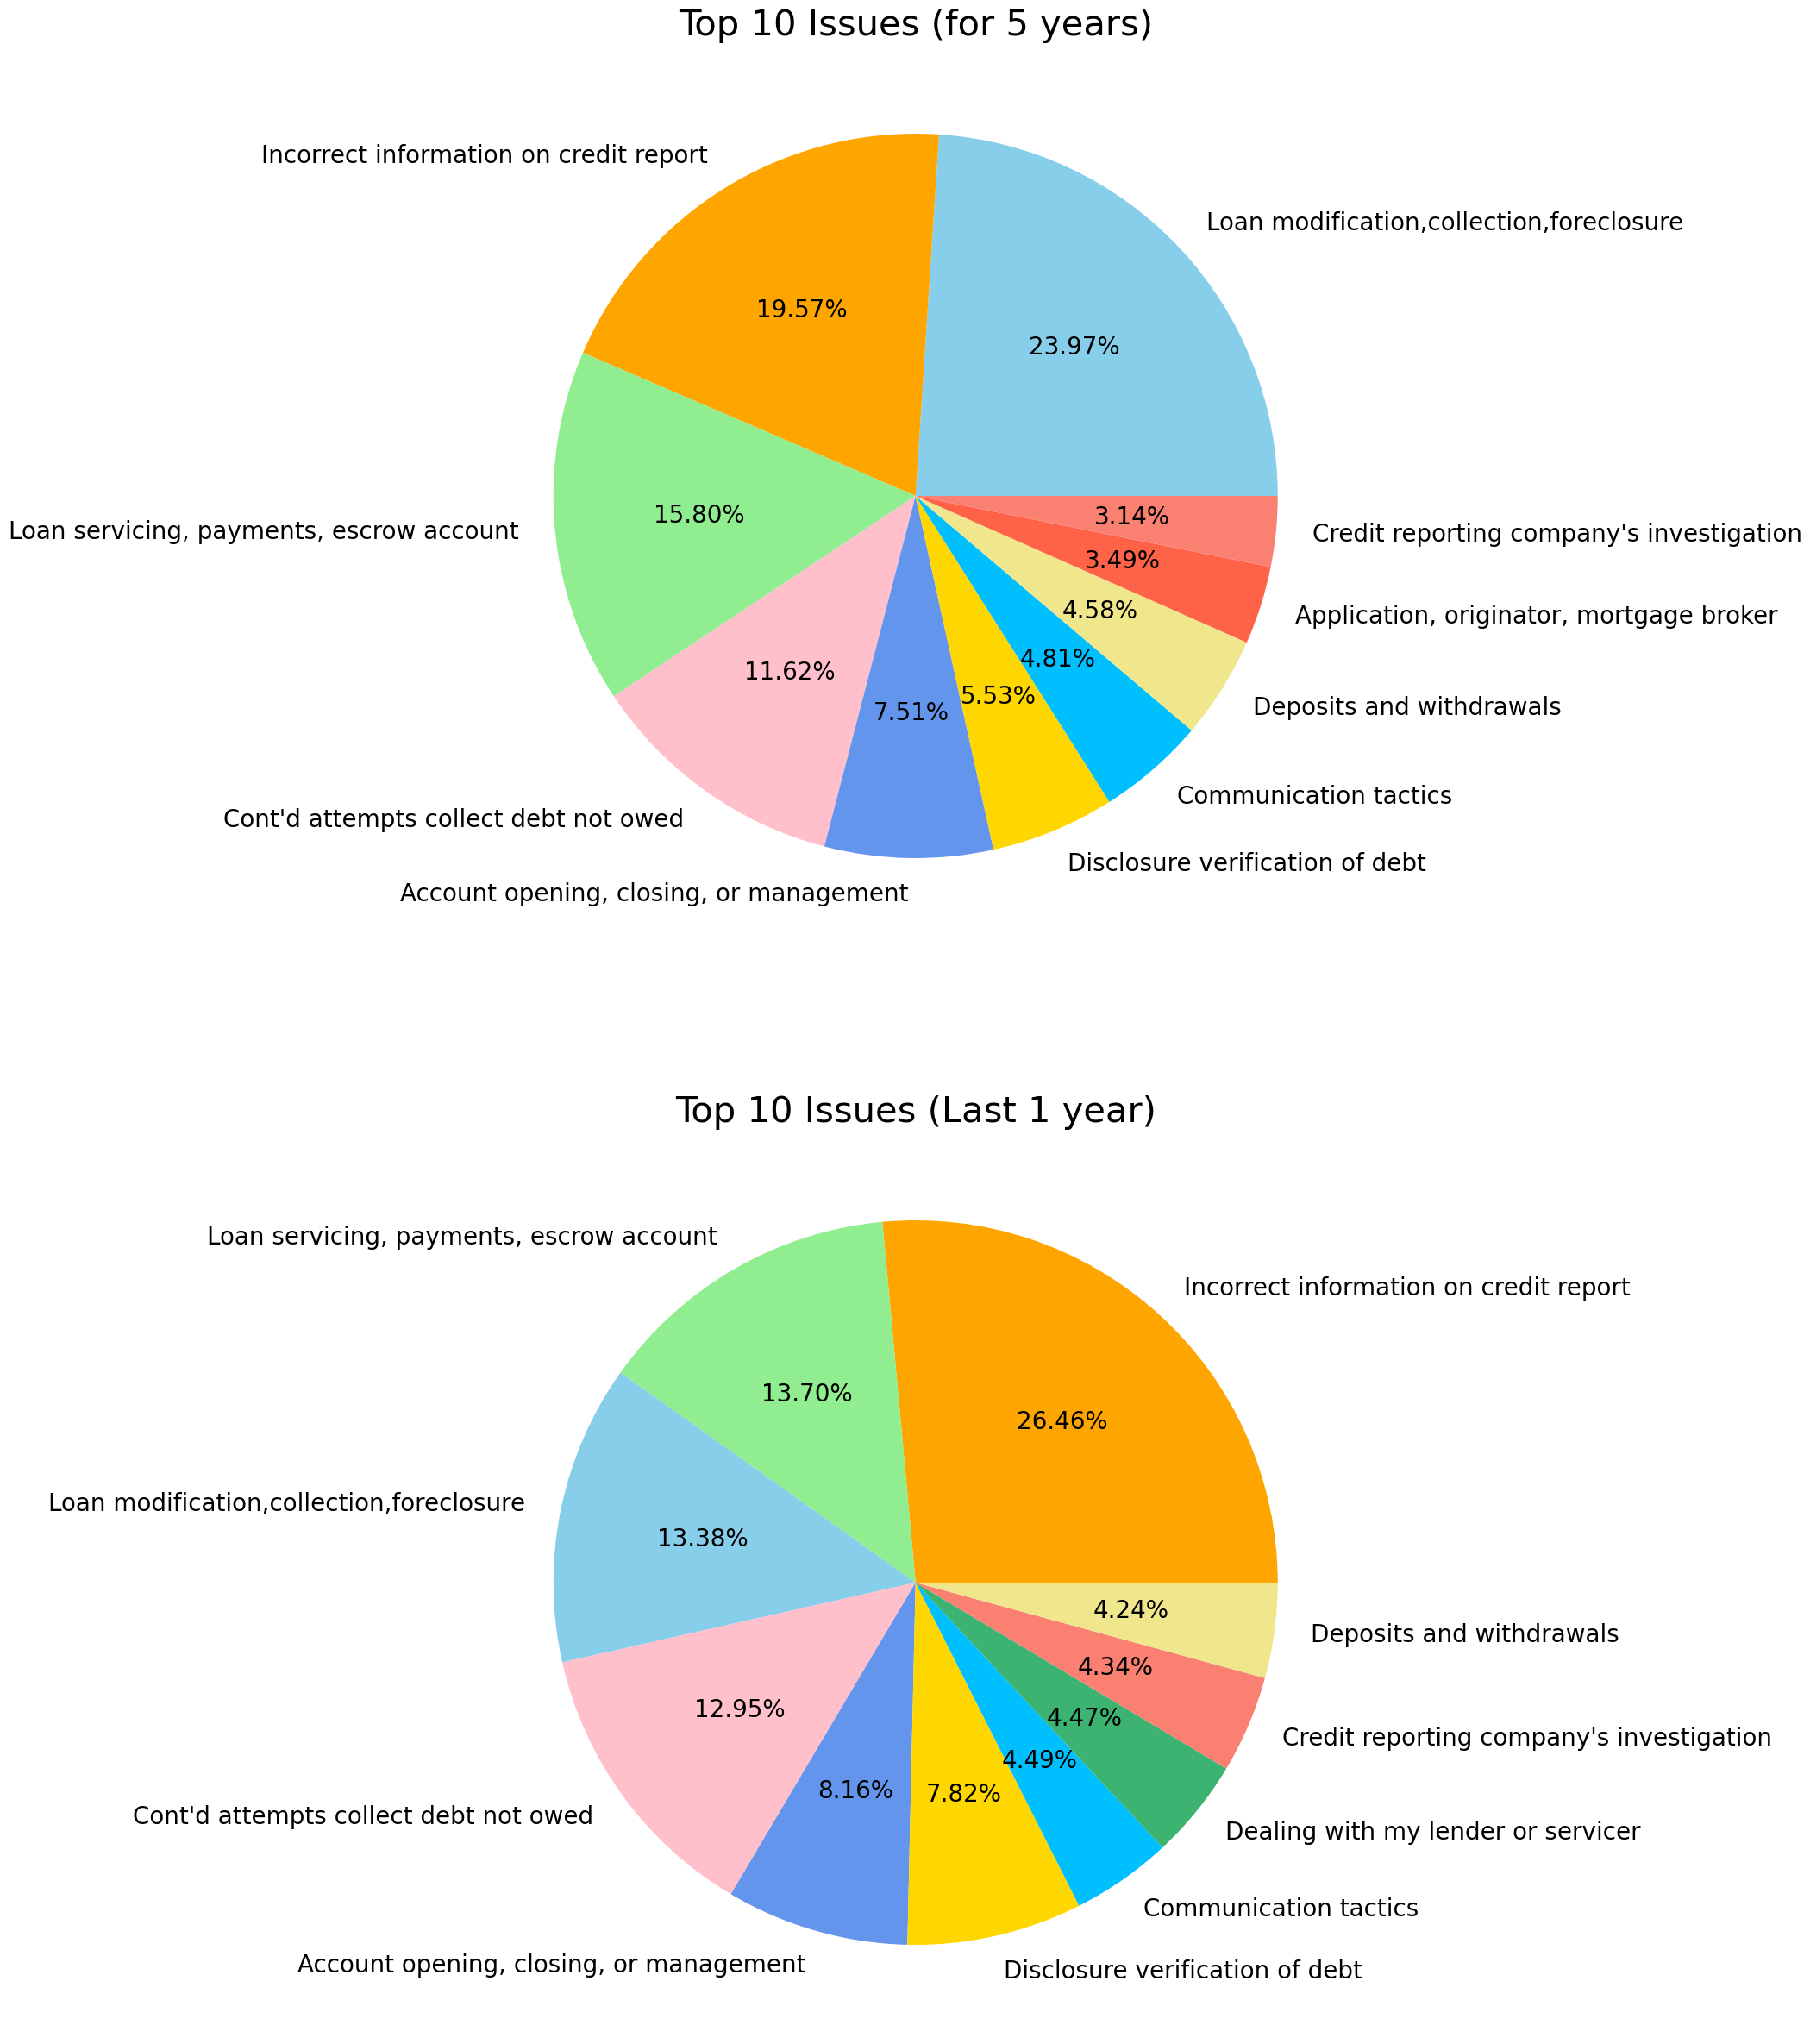

In [298]:
plt.figure(figsize=(20,30))

plt.subplot(2,1,1)
plt.pie(Issue.values[:10], labels=Issue.index[:10], autopct='%1.2f%%', colors=issue_colors1)
plt.title('Top 10 Issues (for 5 years)',fontsize=30)

plt.subplot(2,1,2)
plt.pie(issues_last_year.values[:10], labels=issues_last_year.index[:10], autopct='%1.2f%%', colors=issue_colors2)
plt.title('Top 10 Issues (Last 1 year)',fontsize=30)

plt.show()

## Company Public Response

In [334]:
df['Company public response'].value_counts() / len(df['Company public response'].dropna())

Company has responded to the consumer and the CFPB and chooses not to provide a public response                            0.395077
Company chooses not to provide a public response                                                                           0.361412
Company believes it acted appropriately as authorized by contract or law                                                   0.172187
Company believes the complaint is the result of a misunderstanding                                                         0.015434
Company disputes the facts presented in the complaint                                                                      0.014663
Company believes complaint caused principally by actions of third party outside the control or direction of the company    0.014470
Company believes complaint is the result of an isolated error                                                              0.012101
Company can't verify or dispute the facts in the complaint                  

In [335]:
last_year_records['Company public response'].value_counts() / len(last_year_records['Company public response'].dropna())

Company has responded to the consumer and the CFPB and chooses not to provide a public response                            0.629335
Company believes it acted appropriately as authorized by contract or law                                                   0.162958
Company chooses not to provide a public response                                                                           0.145389
Company believes the complaint is the result of a misunderstanding                                                         0.015187
Company disputes the facts presented in the complaint                                                                      0.012674
Company believes complaint is the result of an isolated error                                                              0.012367
Company believes complaint caused principally by actions of third party outside the control or direction of the company    0.011358
Company can't verify or dispute the facts in the complaint                  

In [336]:
Company_responses = ['Company believes the complaint is the result of a misunderstanding', 
                   "Company can't verify or dispute the facts in the complaint", 
                   'Company believes complaint caused principally by actions of third party outside the control or direction of the company', 
                   'Company believes complaint is the result of an isolated error',
                   'Company disputes the facts presented in the complaint', 
                   'Company believes complaint represents an opportunity for improvement to better serve consumers', 
                   'Company believes complaint relates to a discontinued policy or procedure']

company_public_response = df['Company public response']

company_public_response = company_public_response.replace({itr: 'Others' for itr in Company_responses})

company_public_response.value_counts()/len(company_public_response.dropna())

Company has responded to the consumer and the CFPB and chooses not to provide a public response    0.395077
Company chooses not to provide a public response                                                   0.361412
Company believes it acted appropriately as authorized by contract or law                           0.172187
Others                                                                                             0.071324
Name: Company public response, dtype: float64

In [337]:
last_year_company_public_response = last_year_records['Company public response']

last_year_company_public_response = last_year_company_public_response.replace({itr: 'Others' for itr in Company_responses})

last_year_company_public_response.value_counts()/len(last_year_company_public_response.dropna())

Company has responded to the consumer and the CFPB and chooses not to provide a public response    0.629335
Company believes it acted appropriately as authorized by contract or law                           0.162958
Company chooses not to provide a public response                                                   0.145389
Others                                                                                             0.062319
Name: Company public response, dtype: float64

In [338]:
response_mapping = {'Company has responded to the consumer and the CFPB and chooses not to provide a public response': 'Responded to the consumer but no public response',
                    'Company chooses not to provide a public response': 'No public response', 
                    'Company believes it acted appropriately as authorized by contract or law': 'Acted appropriately under contract',
                    'Others': 'Others'}

company_public_response = company_public_response.map(response_mapping)
last_year_company_public_response = last_year_company_public_response.map(response_mapping)

In [339]:
response_label_colors = {'Responded to the consumer but no public response': 'skyblue', 
                'No public response': 'orange', 
                'Acted appropriately under contract': 'lightgreen', 
                'Others': 'gold' }

response_colors1 = [response_label_colors[label] for label in company_public_response.value_counts().index]
response_colors2 = [response_label_colors[label] for label in last_year_company_public_response.value_counts().index]


In [340]:
company_public_response

391362                                                 NaN
530312                                                 NaN
530303                                                 NaN
257881                                                 NaN
530291                                                 NaN
                                ...                       
668839    Responded to the consumer but no public response
668902                                                 NaN
670002                                                 NaN
669362                                                 NaN
670173                                                 NaN
Name: Company public response, Length: 670598, dtype: object

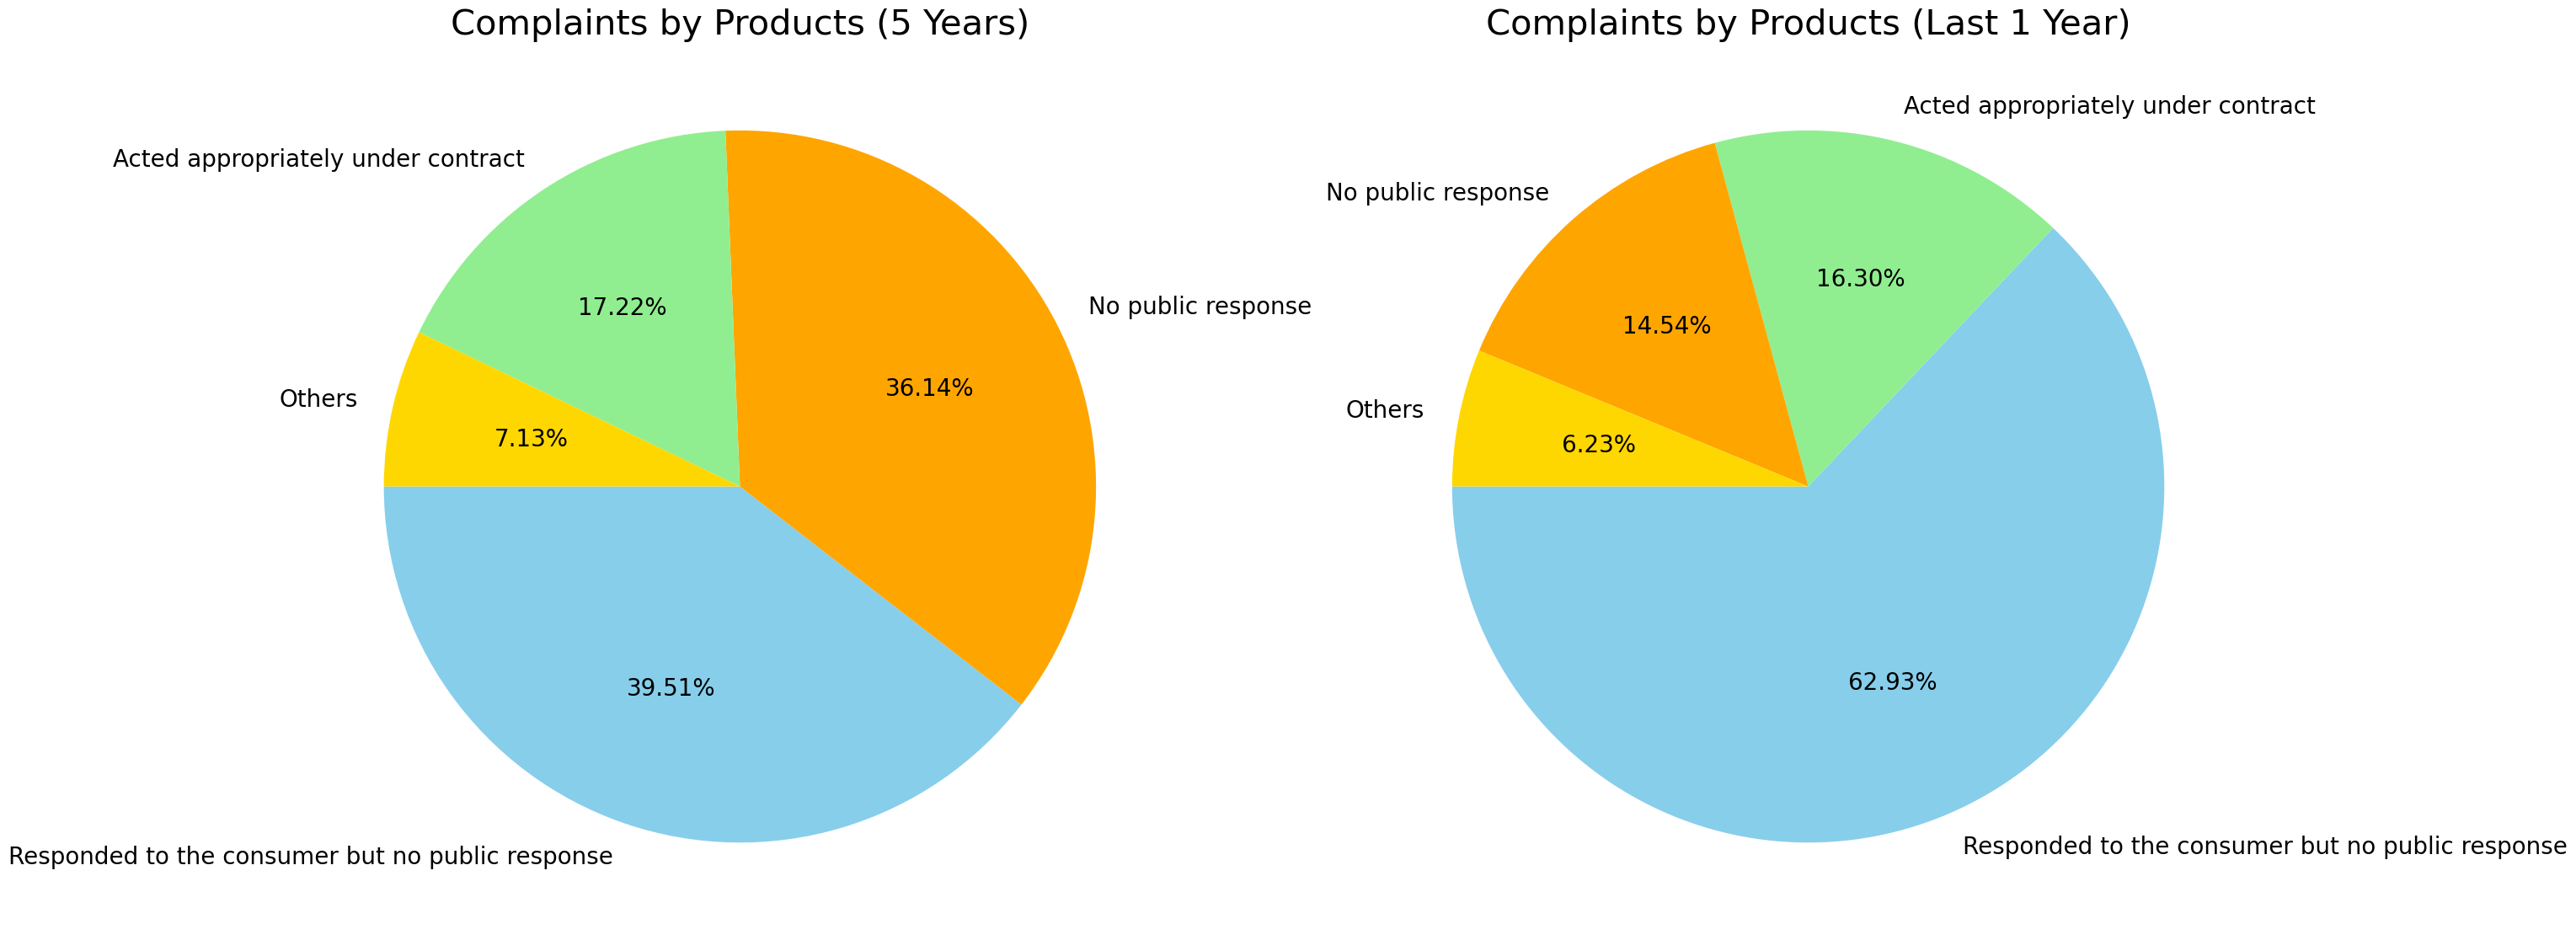

In [420]:
response = company_public_response.value_counts()
last_year_response = last_year_company_public_response.value_counts()

plt.figure(figsize=(30,20))

plt.subplot(1,2,1)
plt.pie(response.values, labels=response.index, autopct='%1.2f%%', colors=response_colors1, startangle=180)
plt.title('Complaints by Products (5 Years)',fontsize=30)
plt.rcParams['font.size'] = 20


plt.subplot(1,2,2)
plt.pie(last_year_response.values, labels=last_year_response.index, autopct='%1.2f%%', colors=response_colors2, startangle=180)
plt.title('Complaints by Products (Last 1 Year)',fontsize=30)
plt.rcParams['font.size'] = 20

plt.show()

## State

In [302]:
df['State'].value_counts()

CA    97640
FL    64688
TX    50856
NY    46245
GA    30641
      ...  
MH       28
MP       23
AS       21
AA       12
PW       11
Name: State, Length: 62, dtype: int64

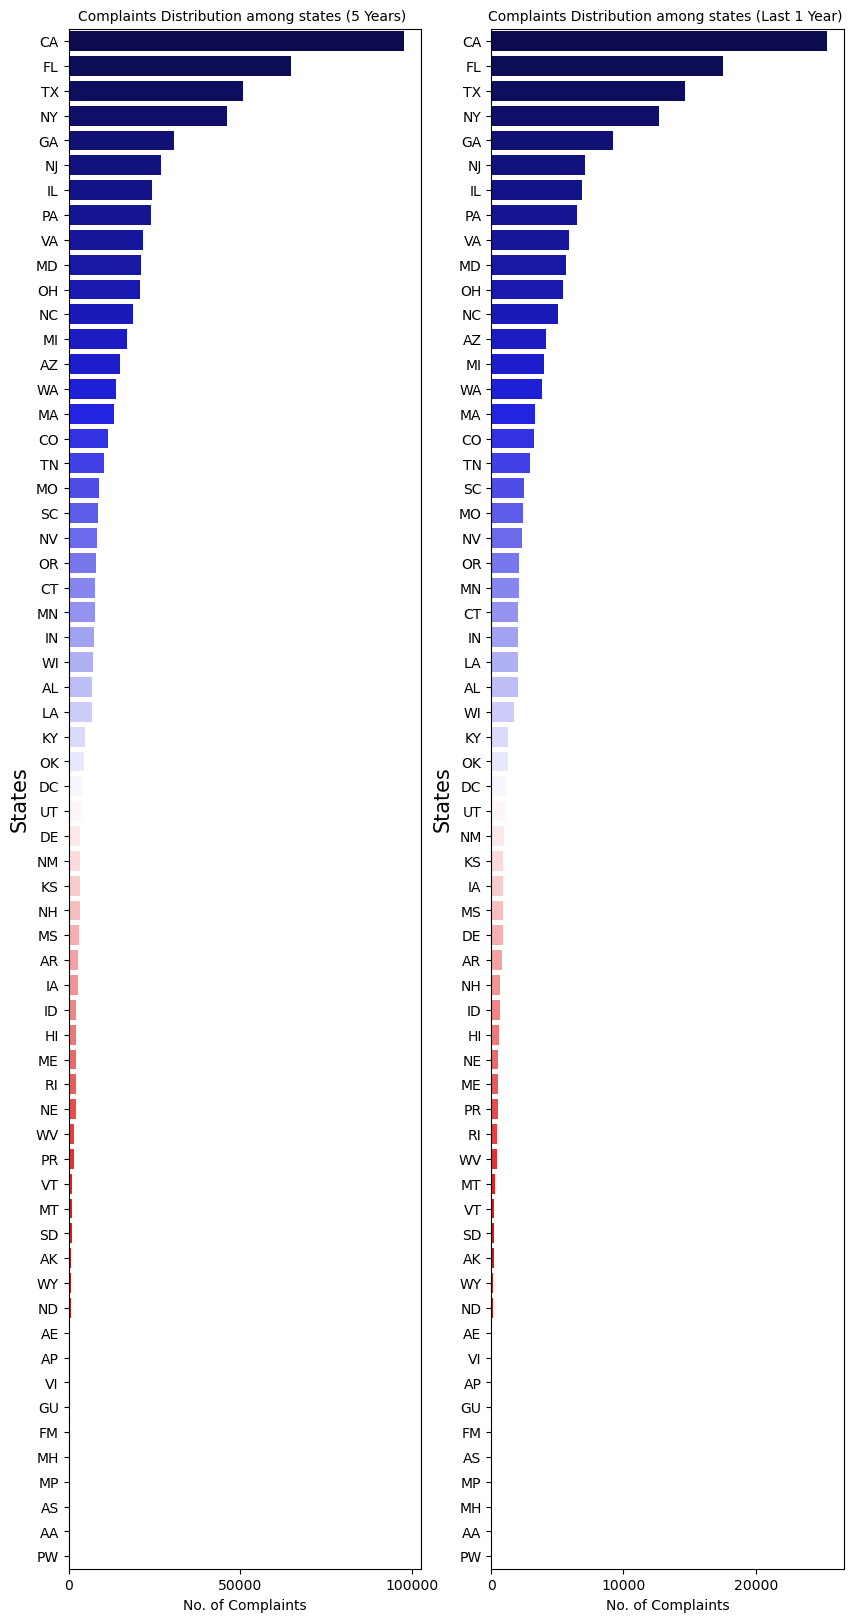

In [362]:
plt.figure(figsize = (10,20))

plt.subplot(1,2,1)
sns.countplot(y='State', data=df, order=df['State'].value_counts().index, palette='seismic')
plt.title("Complaints Distribution among states (5 Years) ",fontsize=10)
plt.yticks(fontsize=10,rotation=0)
plt.xticks(fontsize=10)
plt.xlabel("No. of Complaints",fontsize=10)
plt.ylabel("States",fontsize=15)


plt.subplot(1,2,2)
sns.countplot(y='State', data=last_year_records, order=last_year_records['State'].value_counts().index, palette='seismic')
plt.title("Complaints Distribution among states (Last 1 Year) ",fontsize=10)
plt.yticks(fontsize=10,rotation=0)
plt.xticks(fontsize=10)
plt.xlabel("No. of Complaints",fontsize=10)
plt.ylabel("States",fontsize=15)

plt.show()

## Tags

In [368]:
print(df['Tags'].value_counts() / len(df['Tags'].dropna()))
print(last_year_records['Tags'].value_counts() / len(last_year_records['Tags'].dropna()))

Older American                   0.579341
Servicemember                    0.339713
Older American, Servicemember    0.080946
Name: Tags, dtype: float64
Older American                   0.570133
Servicemember                    0.346629
Older American, Servicemember    0.083238
Name: Tags, dtype: float64


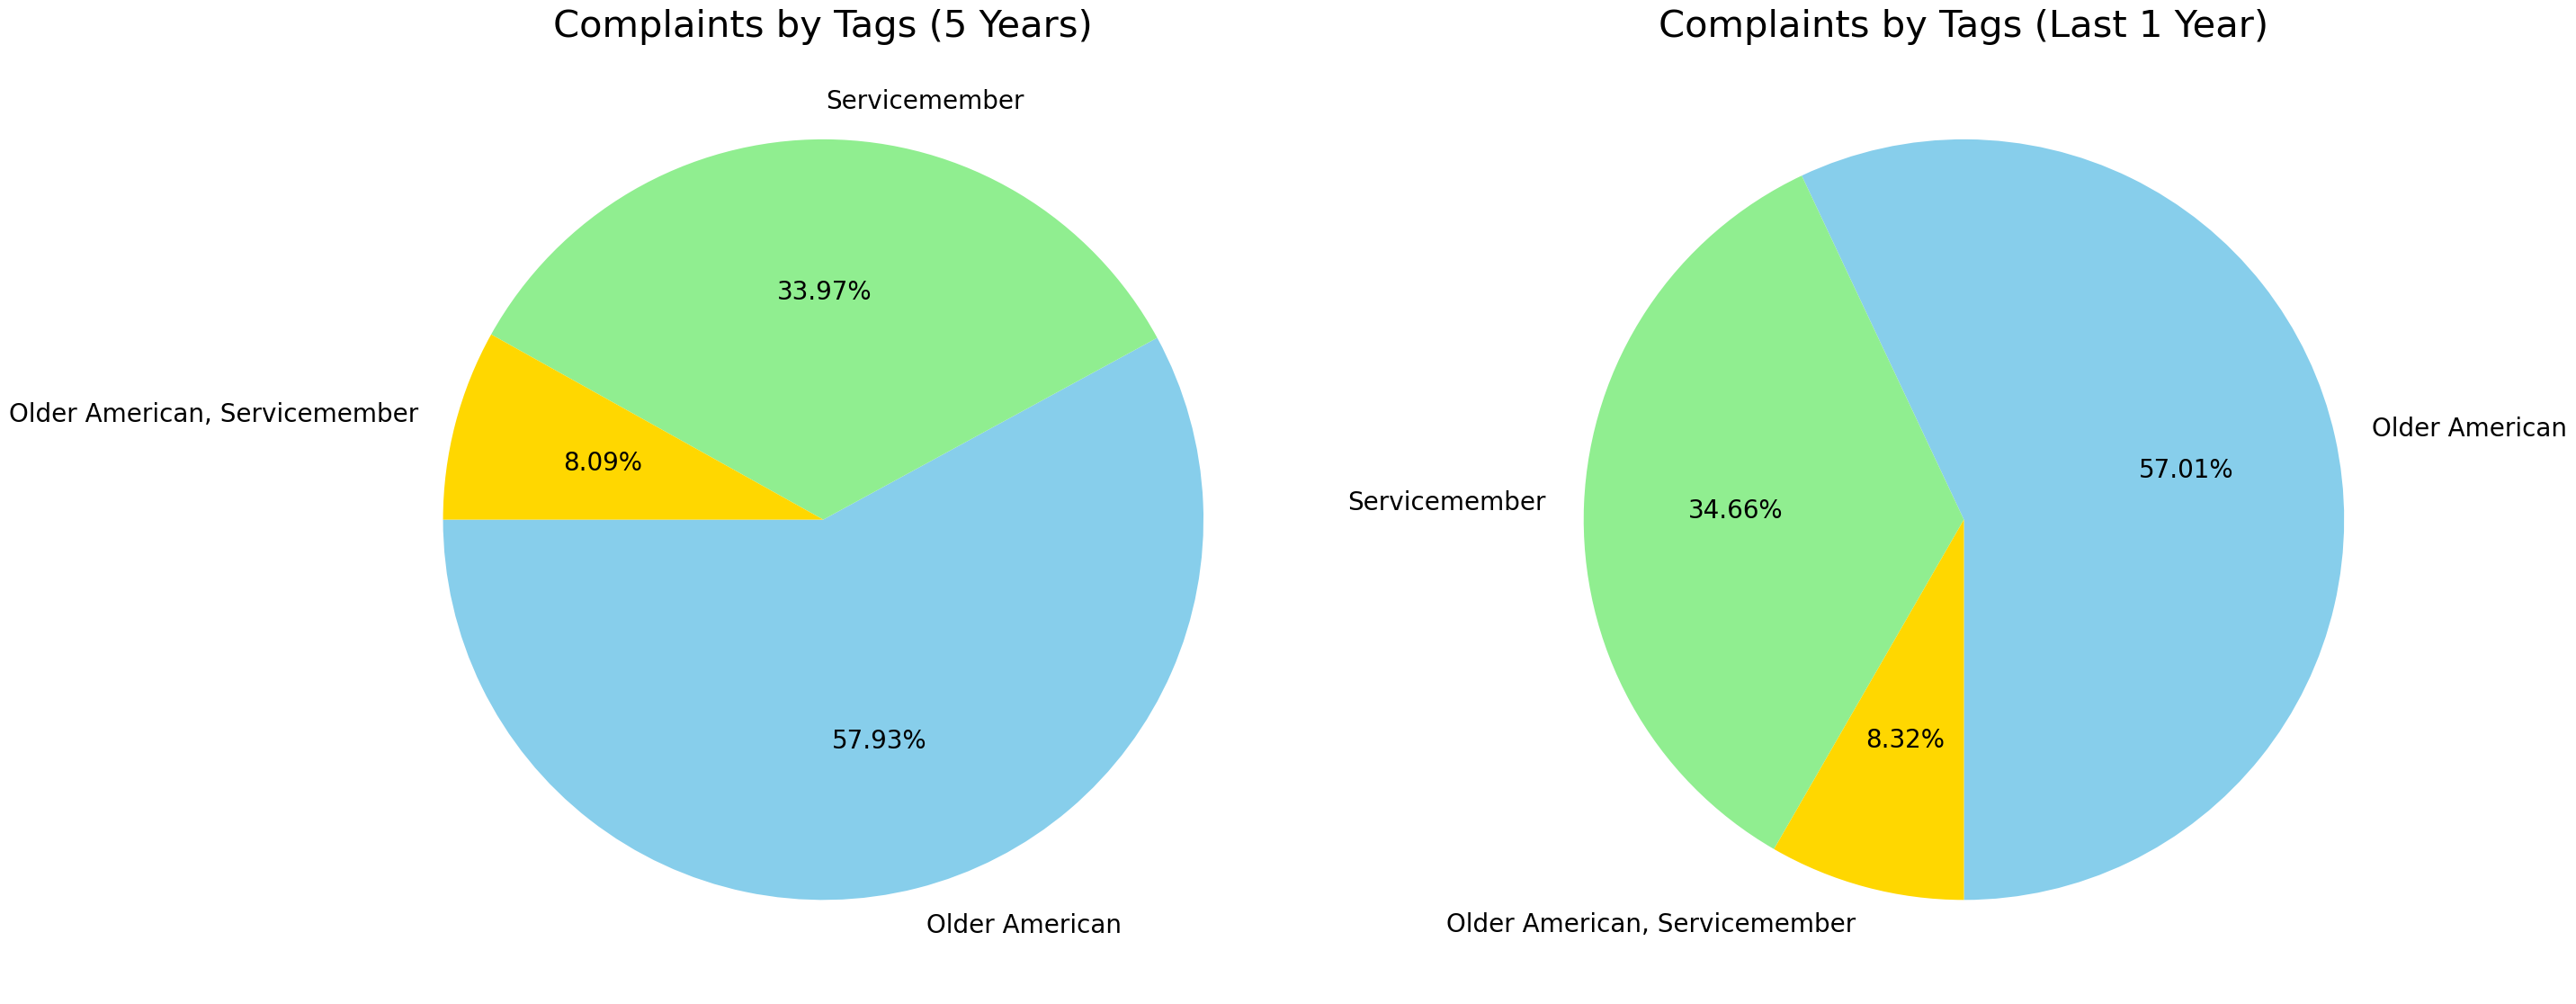

In [378]:
tags = df['Tags'].value_counts()
last_year_tags = last_year_records['Tags'].value_counts()

tags_colours = ['skyblue', 'lightgreen', 'gold']

plt.figure(figsize=(30,20))

plt.subplot(1,2,1)
plt.pie(tags.values, labels=tags.index, autopct='%1.2f%%', colors=tags_colours, startangle=180)
plt.title('Complaints by Tags (5 Years)',fontsize=30)
plt.rcParams['font.size'] = 20


plt.subplot(1,2,2)
plt.pie(last_year_tags.values, labels=last_year_tags.index, autopct='%1.2f%%', colors=tags_colours, startangle=270)
plt.title('Complaints by Tags (Last 1 Year)',fontsize=30)
plt.rcParams['font.size'] = 20

plt.show()

## Submitted Via

In [384]:
via = df['Submitted via']
print(via.value_counts()/len(via.dropna()))

last_year_via = last_year_records['Submitted via']
print(last_year_via.value_counts()/len(last_year_via.dropna()))

Web            0.665130
Referral       0.183752
Phone          0.070667
Postal mail    0.065418
Fax            0.014514
Email          0.000519
Name: Submitted via, dtype: float64
Web            0.729043
Referral       0.127978
Phone          0.065416
Postal mail    0.064184
Fax            0.013334
Email          0.000044
Name: Submitted via, dtype: float64


In [391]:
via_mapping = { 'Web': 'Web', 
               'Referral': 'Referral', 
               'Postal mail': 'Postal mail', 
               'Phone': 'Phone',
               'Fax': 'Fax + Email',
               'Email': 'Fax + Email'}

via = via.map(via_mapping)
last_year_via = last_year_via.map(via_mapping)

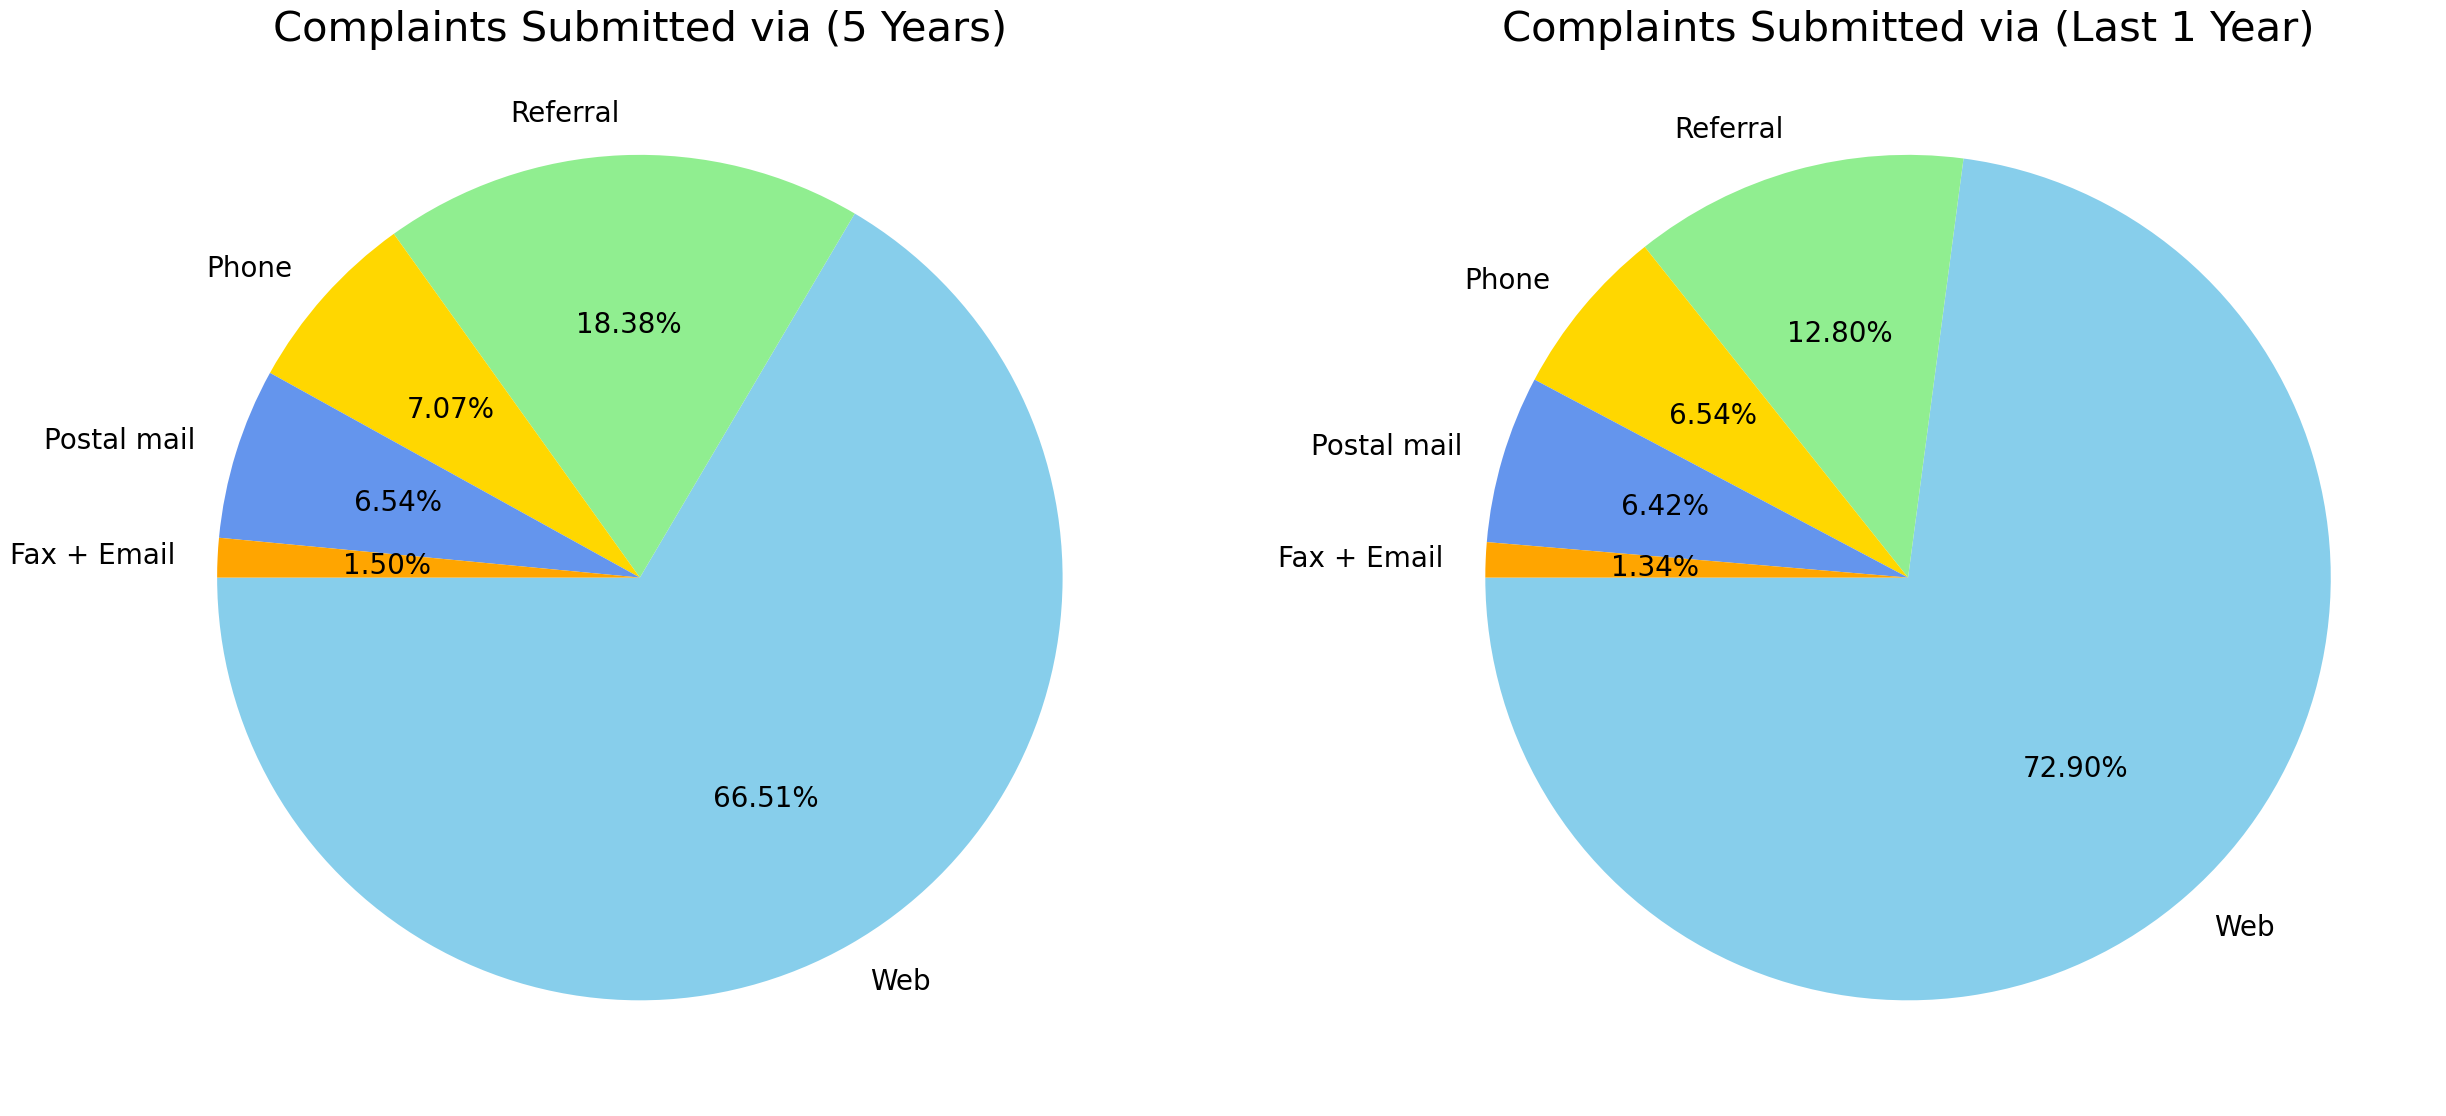

In [394]:
tags_colours = ['skyblue', 'lightgreen', 'gold', 'cornflowerblue', 'orange', 'pink']

plt.figure(figsize=(30,20))

plt.subplot(1,2,1)
plt.pie(via.value_counts().values, labels=via.value_counts().index, autopct='%1.2f%%', colors=tags_colours, startangle=180)
plt.title('Complaints Submitted via (5 Years)',fontsize=30)
plt.rcParams['font.size'] = 20


plt.subplot(1,2,2)
plt.pie(last_year_via.value_counts().values, labels=last_year_via.value_counts().index, autopct='%1.2f%%', colors=tags_colours, startangle=180)
plt.title('Complaints Submitted via (Last 1 Year)',fontsize=30)
plt.rcParams['font.size'] = 20

plt.show()

## Company Response to Consumer

In [409]:
response_to_consumer = df['Company response to consumer']
last_year_response_to_consumer = last_year_records['Company response to consumer']

In [410]:
Rare_response = ['Closed', 'Closed with relief', 'Payday loan', 'In progress', 'Untimely response']

response_to_consumer = response_to_consumer.replace({itr: 'Others' for itr in Rare_response})
print(response_to_consumer.value_counts() / len(response_to_consumer))

last_year_response_to_consumer = last_year_response_to_consumer.replace({itr: 'Others' for itr in Rare_response})
print(last_year_response_to_consumer.value_counts() / len(last_year_response_to_consumer))

Closed with explanation            0.736628
Closed with non-monetary relief    0.126092
Closed with monetary relief        0.067358
Others                             0.043285
Closed without relief              0.026637
Name: Company response to consumer, dtype: float64
Closed with explanation            0.766757
Closed with non-monetary relief    0.119798
Closed with monetary relief        0.060081
Others                             0.053364
Name: Company response to consumer, dtype: float64


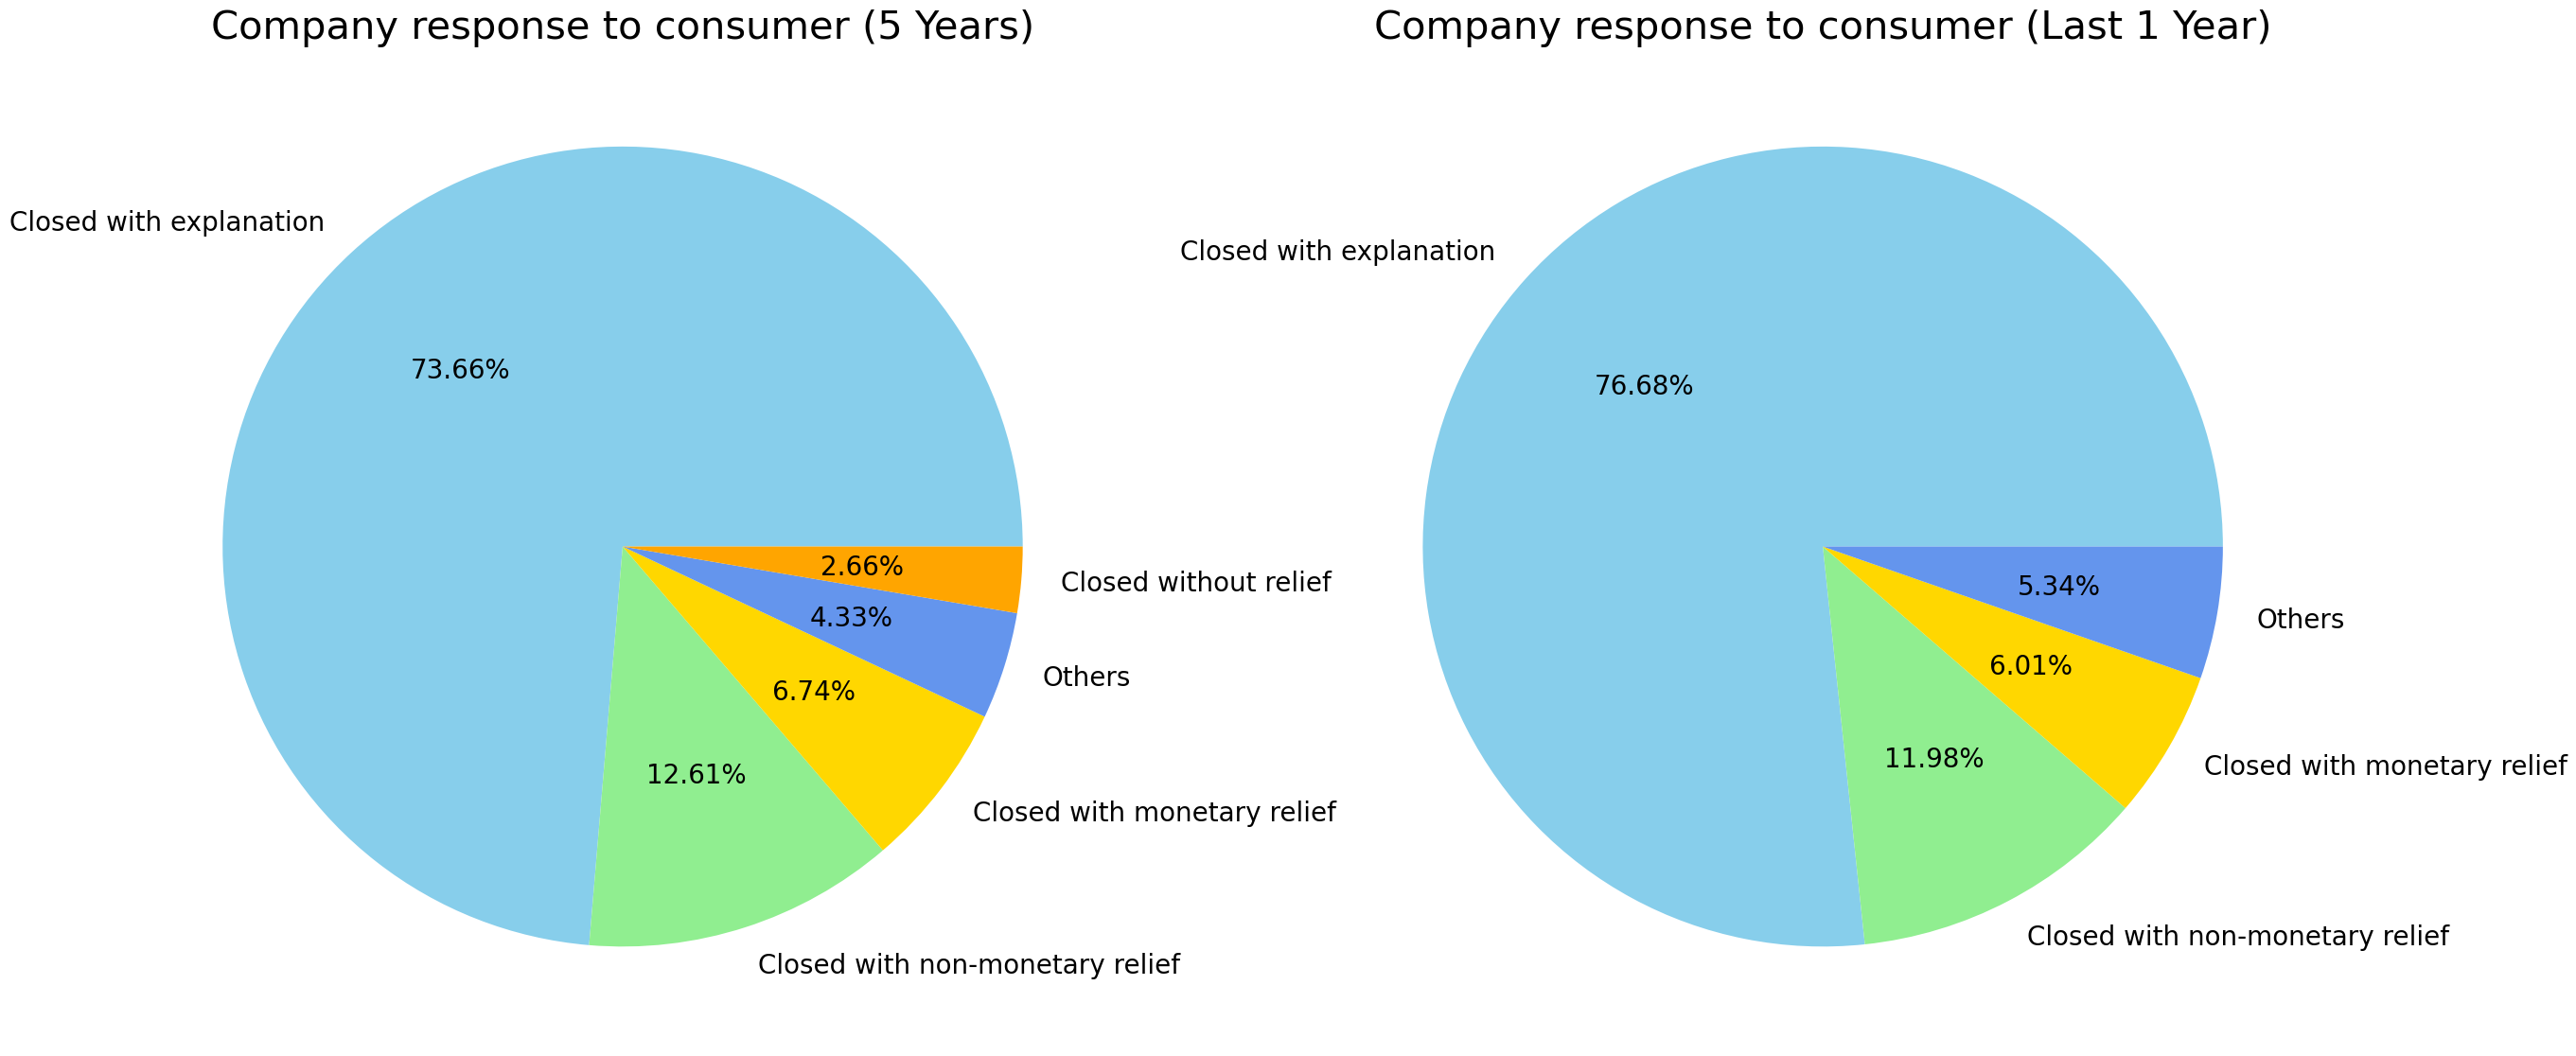

In [419]:
response_to_consumer_colours = ['skyblue', 'lightgreen', 'gold', 'cornflowerblue', 'orange']


plt.figure(figsize=(30,20))

plt.subplot(1,2,1)
plt.pie(response_to_consumer.value_counts().values, labels=response_to_consumer.value_counts().index, autopct='%1.2f%%', colors=response_to_consumer_colours, startangle=0)
plt.title('Company response to consumer (5 Years)', fontsize=30)
plt.rcParams['font.size'] = 20

plt.subplot(1,2,2)
plt.pie(last_year_response_to_consumer.value_counts().values, labels=last_year_response_to_consumer.value_counts().index, autopct='%1.2f%%', colors=response_to_consumer_colours, startangle=0)
plt.title('Company response to consumer (Last 1 Year)', fontsize=30)
plt.rcParams['font.size'] = 20

plt.show()